In [82]:
import requests
import json
import chess.pgn
import io
import pandas as pd
import math
import numpy as np
from chessdotcom import get_player_profile, Client

Client.request_config["headers"]["User-Agent"] = (
    "My Python Application. "
    "Contact me at email@example.com"
)
response = get_player_profile("6macb")

In [67]:
response

ChessDotComResponse(json={'player': {'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/313708649.7919e6b4.200x200o.4c8a5196c09a.jpg', 'player_id': 313708649, '@id': 'https://api.chess.com/pub/player/6macb', 'url': 'https://www.chess.com/member/6macb', 'name': 'Brendan McNamee', 'username': '6macb', 'followers': 3, 'country': 'https://api.chess.com/pub/country/US', 'location': 'FL', 'last_online': 1703518174, 'joined': 1695046563, 'status': 'premium', 'is_streamer': False, 'verified': False, 'league': 'Elite'}}, player=Collection(avatar='https://images.chesscomfiles.com/uploads/v1/user/313708649.7919e6b4.200x200o.4c8a5196c09a.jpg', player_id=313708649, id='https://api.chess.com/pub/player/6macb', url='https://www.chess.com/member/6macb', name='Brendan McNamee', username='6macb', followers=3, country='https://api.chess.com/pub/country/US', location='FL', last_online=1703518174, joined=1695046563, status='premium', is_streamer=False, verified=False, league='Elite'), text='{"avat

In [62]:
player_name = response.player.name
user_name = response.player.username

In [66]:
print(player_name)
print(user_name)

Brendan McNamee
6macb


In [95]:
year = 2023
month = 12

## API

In [97]:
# Api Path
url = f'https://api.chess.com/pub/player/{user_name}/games/{year}/{month}'
url

'https://api.chess.com/pub/player/6macb/games/2023/12'

In [98]:
def get_data_by_month(username, year, month):

    url = f"https://api.chess.com/pub/player/{username}/games/{year}/{month}"

    data = requests.get(url)
    if data.status_code != 200:
        raise Exception("The following response was returned: " + str(data.status_code))
    else:
        data = json.loads(data.text)
        games = data["games"]
        
    all_games=[]
    for game in games:
        pgn = (game['pgn'])
        pgn = io.StringIO(pgn)
        game = chess.pgn.read_game(pgn)
        all_games.append(game)
                
    game_list = []
    for g in all_games:
        moves = (g.mainline_moves())
        moves = [str(x) for x in moves]
        
        white = (g.headers['White'])
        if white.lower() == username.lower():
            playing_as_white = 1
        else:
            playing_as_white = 0
        
        if len(moves)>1:
            move_made = (moves[1])
        else:
            move_made = ""
        
        game = {"date": (g.headers["Date"]), "player_white": white, "player_black": (g.headers['Black']), "playing_as_white" : playing_as_white, "result": (g.headers['Result']), "termination": (g.headers['Termination']), "moves": moves, "no_of_moves": (math.ceil(len(moves)/2)), "first_move": (moves[0]), "response": move_made}
    
        
        game_list.append(game)
    game_list = pd.DataFrame(game_list)
    return game_list

In [99]:
this_year = [("2023", "01"),  ("2023", "02"), ("2023", "03"), ("2023", "04"), ("2023", "05"), ("2023", "06"), 
             ("2023", "07"), ("2023", "08"), ("2023", "09"), ("2023", "10"), ("2023", "11"), ("2023", "12")]

In [101]:
all_months = []
for date in this_year:
    year = date[0]
    month = date[1]
    
    df = get_data_by_month(user_name, year, month)
    all_months.append(df)
    time.sleep(10)
    print("Sleeping")

Exception: The following response was returned: 403

In [86]:
def combine_months(dfs):
    df_1 = pd.concat(dfs, ignore_index=True)
    return df

In [ ]:
all_months = combine_months(all_months)

# File

In [64]:
chess_path = 'DATA/ChessCom_6macb_202312.pgn'

In [65]:
pgn_file_path = chess_path

# Player name for whom you want to extract the rating
target_player = '6macb'

# Initialize a list to store game information
games_data = []

# Open the PGN file
with open(pgn_file_path) as f:
    # Read the PGN file using the chess.pgn library
    game = chess.pgn.read_game(f)
    
    # Initialize a counter for GameID
    game_id_counter = 1

    # Loop through the games in the PGN file
    while game:
        # Extract the headers (metadata) of the game
        headers = game.headers

        # Extract the time control information
        time_control = headers.get('TimeControl', 'Time control not provided')

        # Check if the time control is 900+10
        if '900+10' in time_control:
            # Extract the names of White and Black players
            white_name = headers.get('White', 'Unknown')
            white_elo = headers.get('WhiteElo', 'Unknown')
            white_elo = int(white_elo)
            
            black_name = headers.get('Black', 'Unknown')
            black_elo = headers.get('BlackElo', 'Unknown')
            black_elo = int(black_elo)
            
            # Extract the result of the game
            result = headers.get('Result', 'Result not provided')
            
            # Extract the total number of moves
            num_moves = len([move for move in game.mainline_moves()])
            
            # Extract the first move from both players
            moves = list(game.mainline_moves())
            first_move_white = moves[0].uci() if moves else 'No moves'
            first_move_black = moves[1].uci() if len(moves) > 1 else 'No moves'
            
            # Extract the date of the game
            date = headers.get('Date', 'Date not provided')

            # Determine the winner and loser based on the result
            if result == '1-0':
                winner = white_name
                loser = black_name
                winning_color = 'White'
            elif result == '0-1':
                winner = black_name
                loser = white_name
                winning_color = 'Black'
            else:
                winner = 'Draw'
                loser = 'Draw'
                winning_color = 'Draw'
                
            # Extract the Elo rating for the specified player ('6macb')
            my_rating = white_elo if white_name == target_player else black_elo if black_name == target_player else 'No rating'

            # Extract if W/L for the specified player ('6macb')
            my_result = 'Win' if winner == target_player else 'Loss' if loser == target_player else 'Draw'
            
            # Extract the color for the specified player ('6macb')
            my_color = 'White' if white_name == target_player else 'Black' if black_name == target_player else 'No color'
            
            # Elo Difference (6macb-opponent)
            opp_rating = black_elo if target_player == white_name else white_elo
            elo_diff = my_rating - opp_rating 
            
            # Append game information to the list
            games_data.append({
                'GameID': game_id_counter,
                'TimeControl': time_control,
                'Date': date,
                'NumMoves': num_moves,
                'WhiteName': white_name,
                'WhiteElo': white_elo,
                'BlackName': black_name,
                'BlackElo': black_elo,
                'WinningColor': winning_color,
                'Elo Diff': elo_diff,
                'MyRating': my_rating,
                'MyResult': my_result,
                'MyColor': my_color,
                'FirstMoveWhite': first_move_white,
                'FirstMoveBlack': first_move_black,
            })

            # Increment the game ID counter
            game_id_counter += 1
            
        # Move to the next game in the PGN file
        game = chess.pgn.read_game(f)

# Convert the list of dictionaries into a pandas DataFrame
df = pd.DataFrame(games_data)

# Print the DataFrame
df.head(7)

,GameID,TimeControl,Date,NumMoves,WhiteName,WhiteElo,BlackName,BlackElo,WinningColor,Elo Diff,MyRating,MyResult,MyColor,FirstMoveWhite,FirstMoveBlack
0,1,900+10,2023.12.26,66,INGVOTI,904,6macb,999,Black,95,999,Win,Black,e2e4,d7d6
1,2,900+10,2023.12.26,52,StevenEtphais,968,6macb,993,Black,25,993,Win,Black,d2d4,g8f6
2,3,900+10,2023.12.26,54,6macb,985,Carlogalbas,1045,Black,-60,985,Loss,White,d2d4,d7d5
3,4,900+10,2023.12.26,118,6macb,992,Gigaselm,991,Black,1,992,Loss,White,d2d4,e7e5
4,5,900+10,2023.12.26,41,hekimakbas,1013,6macb,1000,Black,-13,1000,Win,Black,e2e4,d7d6
5,6,900+10,2023.12.26,83,6macb,991,haych808,966,White,25,991,Win,White,d2d4,d7d5
6,7,900+10,2023.12.26,16,6macb,983,Sharan101112,1019,Black,-36,983,Loss,White,d2d4,e7e5


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GameID          116 non-null    int64 
 1   TimeControl     116 non-null    object
 2   Date            116 non-null    object
 3   NumMoves        116 non-null    int64 
 4   WhiteName       116 non-null    object
 5   WhiteElo        116 non-null    int64 
 6   BlackName       116 non-null    object
 7   BlackElo        116 non-null    int64 
 8   WinningColor    116 non-null    object
 9   Elo Diff        116 non-null    int64 
 10  MyRating        116 non-null    int64 
 11  MyResult        116 non-null    object
 12  MyColor         116 non-null    object
 13  FirstMoveWhite  116 non-null    object
 14  FirstMoveBlack  116 non-null    object
dtypes: int64(6), object(9)
memory usage: 13.7+ KB


# Analysis

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.facecolor':'white'})

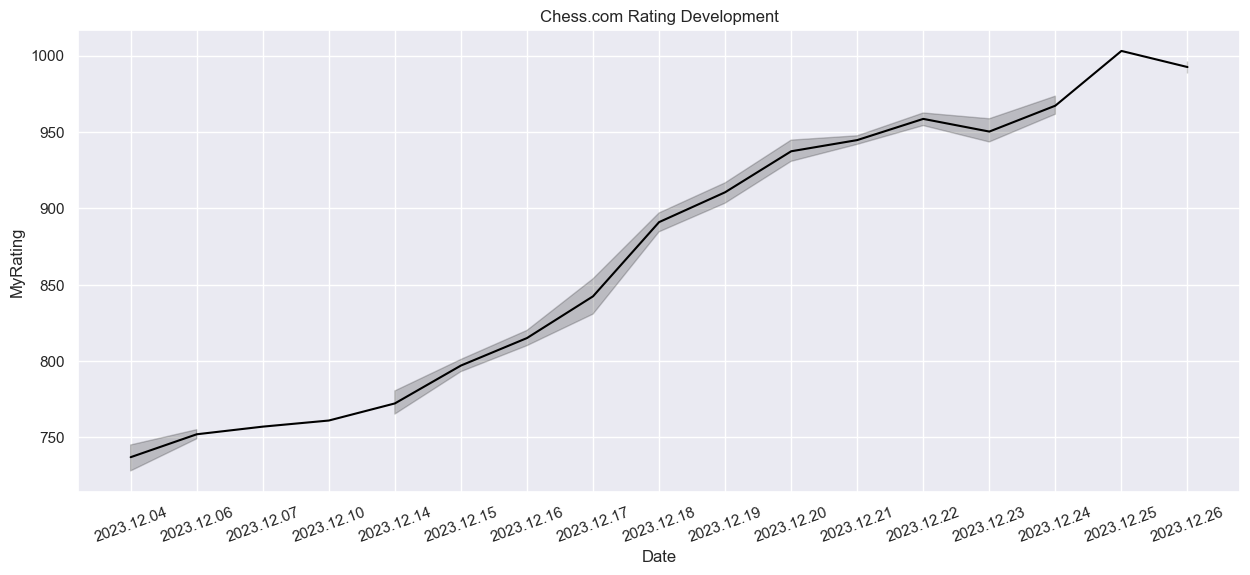

In [60]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Chess.com Rating Development")
sns.lineplot(x="Date", y="MyRating", data=df.iloc[::-1], color="black")
plt.xticks(rotation=20)
plt.show()

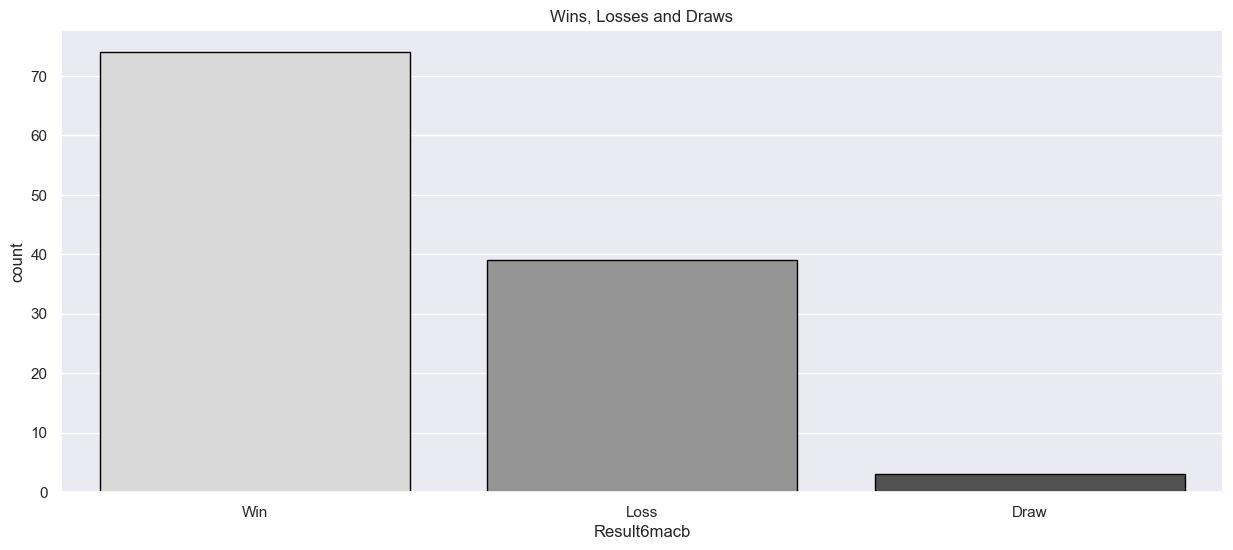

In [42]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Wins, Losses and Draws")
sns.countplot(data=df, x='MyResult', palette="Greys", edgecolor="black")
plt.show()

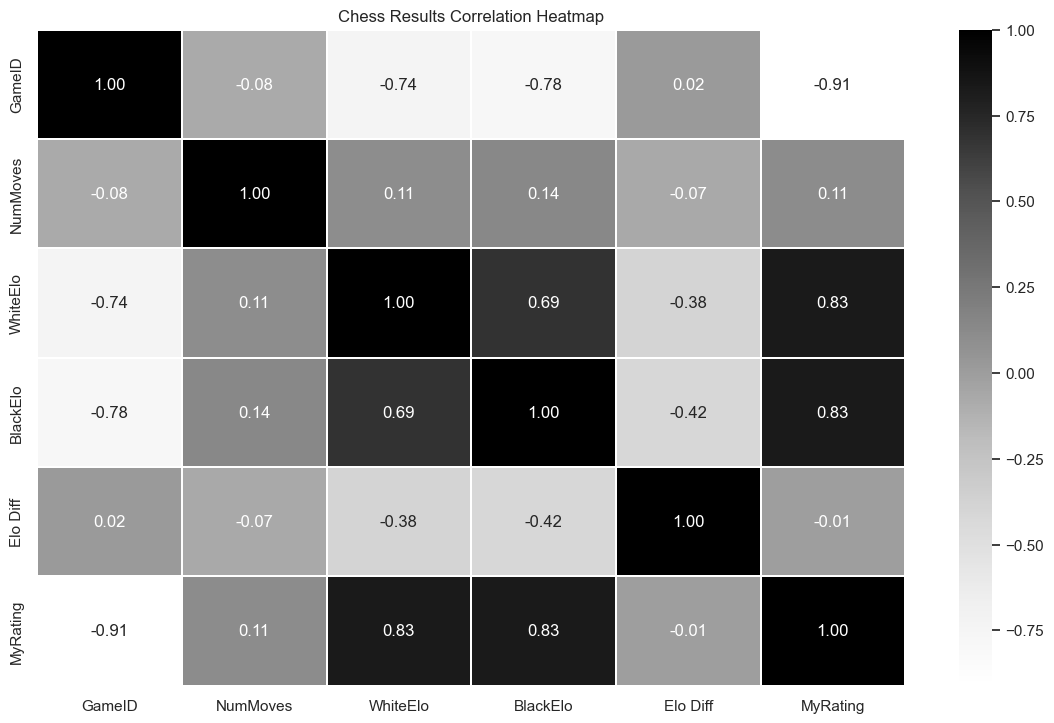

In [56]:
corr = df.corr()
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(corr, cmap="Greys", annot=True, fmt='.2f', linewidths=.05, ax=ax).set_title("Chess Results Correlation Heatmap")
fig.subplots_adjust(top=0.93)

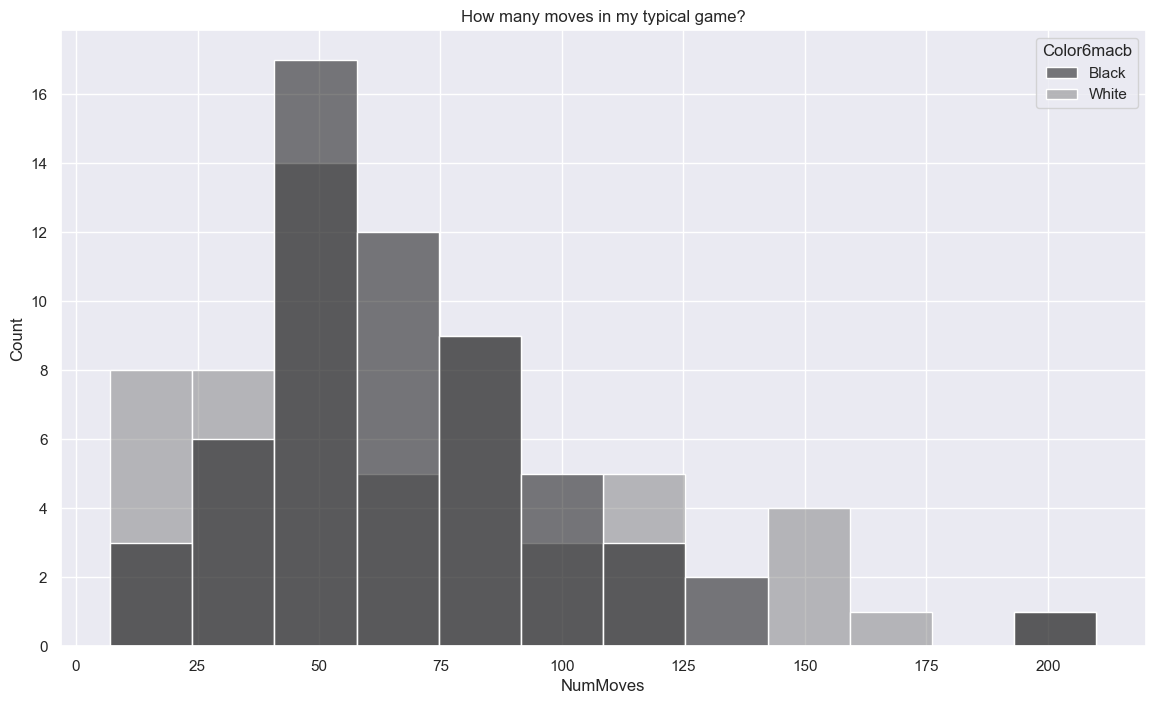

In [46]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("How many moves in my typical game?")

sns.histplot(df, x="NumMoves", hue="MyColor", palette={"Black": "Black", "White": "Grey"})
plt.close(2)